In [6]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from BayesianOptimization.bayesian_optimization import BayesianOptimization

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from MACD_BOLLStrategy import MACD_BOLLStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [13]:
def run_backtest(config, trading_data, ohlc_data, short_window, delta_window, window, a):
    short_window = int(short_window)
    long_window = short_window + int(delta_window)
    window = int(window)
    config['title'] = "MACD_BOLLStrategy" + "_" +  str(short_window) + "_" + str(long_window) + "_" + str(window) + "_" + str(a)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = MACD_BOLLStrategy(config, events_queue, data_handler,
                            short_window=short_window, long_window=long_window,
                            window = window, a = a)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    return (results['cum_returns'][-1] - 1)

## Setting

In [14]:
config = {
    "csv_dir": "C:/backtest/Binance",
    "out_dir": "C:/backtest/results/MACD_BOLLStrategy",
    "title": "MACD_BOLLStrategy",
    "is_plot": False,
    "save_plot": False,
    "save_tradelog": False,
    "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
    "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
    "equity": 1.0,
    "freq": 60,      # min
    "commission_ratio": 0.001,
    "suggested_quantity": None,     # None or a value
    "max_quantity": None,           # None or a value, Maximum purchase quantity
    "min_quantity": None,           # None or a value, Minimum purchase quantity
    "min_handheld_cash": None,      # None or a value, Minimum handheld funds
    "exchange": "Binance",
    "tickers": ['BTCUSDT']
}

In [15]:
# trading_data = {}
# for ticker in config['tickers']:
#     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
#     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

ohlc_data = {}
for ticker in config['tickers']:
    # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
    ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker +'_OHLC_60min.h5', key=ticker)

trading_data = None

In [16]:
gp_params = {"alpha": 1e-5}

## Acquisition Function "Upper Confidence Bound"

* Prefer exploitation (kappa=1.0)

* Prefer exploration (kappa=10)


## Acquisition Function "Expected Improvement"

* Prefer exploitation (xi=1e-4)
* Prefer exploration (xi=0.1)

In [17]:
BO = BayesianOptimization(
    run_backtest,
    {'short_window': (1, 120),
    'delta_window': (1, 120),
    'window': (1, 240),
    'a': (0.1, 3)},
    is_int = [1, 1, 1, 0], 
    invariant = {
        'config': config,
        'trading_data': trading_data,
        'ohlc_data': ohlc_data
    },
    random_state = 1
)
# BO.explore({
#     'short_window': np.arange(1, 120, 20),
#     'delta_window': np.arange(1, 120, 20)
#     },
#     eager=True)
BO.maximize(init_points=50, n_iter=100, acq="ei", xi=0.01, **gp_params)

Initialization
---------------------------------------------------------------------------------------
 Step |   Time |      Value |         a |   delta_window |   short_window |    window | 
---------------------------------
MACD_BOLLStrategy_38_154
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4543145922
Max Drawdown: 46.5228362173
Max Drawdown Duration: 2510
Total Returns: 0.7110169929
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 12.24%
Average Win: 48.06%
Average Loss: -9.24%
Best Trade: 113.80%
Worst Trade: -13.17%
Worst Trade Date: 5 days 00:00:00
Avg Days in Trade: 9 days 23:00:00
---------------------------------
    1 | 00m09s |    0.71102 | 2.277733 | 116.000000 | 38.0000

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5449571612
Max Drawdown: 43.9455136052
Max Drawdown Duration: 2510
Total Returns: 0.7489157503
---------------------------------
Trades: 6
Trade Winning: 50%
Average Trade: 16.05%
Average Win: 44.37%
Average Loss: -12.27%
Best Trade: 108.62%
Worst Trade: -13.49%
Worst Trade Date: 2 days 08:00:00
Avg Days in Trade: 11 days 18:10:00
---------------------------------
   11 | 00m15s |    0.74892 | 1.404745 | 58.000000 | 2.000000 | 217.000000 | 
---------------------------------
MACD_BOLLStrategy_77_81
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4340465237
Max Drawdown: 40.4768888793
Max Drawdown Duration: 2510
Tota

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1953592370
Max Drawdown: 41.4559655041
Max Drawdown Duration: 2510
Total Returns: 0.5176712525
---------------------------------
Trades: 4
Trade Winning: 50%
Average Trade: 18.08%
Average Win: 49.42%
Average Loss: -13.27%
Best Trade: 93.15%
Worst Trade: -18.64%
Worst Trade Date: 5 days 18:00:00
Avg Days in Trade: 18 days 19:30:00
---------------------------------
   21 | 00m12s |    0.51767 | 2.669232 | 110.000000 | 85.000000 | 53.000000 | 
---------------------------------
MACD_BOLLStrategy_12_128
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5846075766
Max Drawdown: 42.9922700456
Max Drawdown Duration: 2510
Tot

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.3192646979
Max Drawdown: 54.2988742497
Max Drawdown Duration: 2510
Total Returns: 0.0166460195
---------------------------------
Trades: 3
Trade Winning: 33%
Average Trade: 5.77%
Average Win: 50.88%
Average Loss: -16.78%
Best Trade: 50.88%
Worst Trade: -28.90%
Worst Trade Date: 10 days 15:00:00
Avg Days in Trade: 19 days 10:00:00
---------------------------------
   31 | 00m18s |    0.01665 | 2.804527 | 88.000000 | 106.000000 | 201.000000 | 
---------------------------------
MACD_BOLLStrategy_114_122
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8246297166
Max Drawdown: 52.3415683920
Max Drawdown Duration: 2510
T

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5921031602
Max Drawdown: 44.0859238500
Max Drawdown Duration: 2510
Total Returns: 0.8572238179
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 14.91%
Average Win: 55.11%
Average Loss: -9.21%
Best Trade: 136.80%
Worst Trade: -16.46%
Worst Trade Date: 2 days 22:00:00
Avg Days in Trade: 10 days 09:22:30
---------------------------------
   41 | 00m18s |    0.85722 | 0.182089 | 101.000000 | 62.000000 | 197.000000 | 
---------------------------------
MACD_BOLLStrategy_23_51
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6367013998
Max Drawdown: 36.7522592975
Max Drawdown Duration: 2018
Tot

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.0518675184
Max Drawdown: 53.0129411853
Max Drawdown Duration: 2736
Total Returns: 0.4540550874
---------------------------------
Trades: 22
Trade Winning: 36%
Average Trade: 2.45%
Average Win: 14.17%
Average Loss: -4.26%
Best Trade: 26.66%
Worst Trade: -12.78%
Worst Trade Date: 1 days 12:00:00
Avg Days in Trade: 3 days 16:49:05
---------------------------------
   51 | 00m34s |    0.45406 | 0.100000 | 59.000000 | 1.000000 | 184.000000 | 
---------------------------------
MACD_BOLLStrategy_68_77
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.0933624292
Max Drawdown: 46.3585915900
Max Drawdown Duration: 2510
Total R

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3994571935
Max Drawdown: 45.2488775016
Max Drawdown Duration: 2510
Total Returns: 0.7224505889
---------------------------------
Trades: 9
Trade Winning: 56%
Average Trade: 13.80%
Average Win: 35.48%
Average Loss: -13.30%
Best Trade: 157.09%
Worst Trade: -18.68%
Worst Trade Date: 2 days 22:00:00
Avg Days in Trade: 10 days 03:53:20
---------------------------------
   61 | 00m36s |    0.72245 | 1.660702 | 19.000000 | 63.000000 | 49.000000 | 
---------------------------------
MACD_BOLLStrategy_18_129
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2181827068
Max Drawdown: 50.1228538523
Max Drawdown Duration: 2510
Tot

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2732559894
Max Drawdown: 54.9104369852
Max Drawdown Duration: 2510
Total Returns: 0.6017956700
---------------------------------
Trades: 9
Trade Winning: 33%
Average Trade: 11.84%
Average Win: 55.37%
Average Loss: -9.93%
Best Trade: 136.81%
Worst Trade: -21.22%
Worst Trade Date: 2 days 14:00:00
Avg Days in Trade: 9 days 11:20:00
---------------------------------
   71 | 00m48s |    0.60180 | 0.202599 | 57.000000 | 71.000000 | 191.000000 | 
---------------------------------
MACD_BOLLStrategy_53_151
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4932086275
Max Drawdown: 45.1626428099
Max Drawdown Duration: 2510
Tota

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.0720664235
Max Drawdown: 47.1640397075
Max Drawdown Duration: 2736
Total Returns: 0.4430761009
---------------------------------
Trades: 14
Trade Winning: 50%
Average Trade: 3.58%
Average Win: 14.68%
Average Loss: -7.53%
Best Trade: 21.53%
Worst Trade: -14.75%
Worst Trade Date: 2 days 09:00:00
Avg Days in Trade: 4 days 19:04:17
---------------------------------
   81 | 00m38s |    0.44308 | 2.193325 | 27.000000 | 12.000000 | 46.000000 | 
---------------------------------
MACD_BOLLStrategy_12_132
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2718268379
Max Drawdown: 35.4944389761
Max Drawdown Duration: 2510
Total 

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5771079640
Max Drawdown: 47.3835784064
Max Drawdown Duration: 2510
Total Returns: 0.8639867493
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 14.77%
Average Win: 55.28%
Average Loss: -9.54%
Best Trade: 133.23%
Worst Trade: -18.90%
Worst Trade Date: 2 days 18:00:00
Avg Days in Trade: 10 days 07:45:00
---------------------------------
   91 | 00m55s |    0.86399 | 0.152003 | 101.000000 | 76.000000 | 194.000000 | 
---------------------------------
MACD_BOLLStrategy_19_94
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5077676102
Max Drawdown: 38.9415768732
Max Drawdown Duration: 2736
Tot

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3676375607
Max Drawdown: 32.2187314201
Max Drawdown Duration: 2510
Total Returns: 0.5675455864
---------------------------------
Trades: 2
Trade Winning: 100%
Average Trade: 28.39%
Average Win: 28.39%
Average Loss: nan%
Best Trade: 55.69%
Worst Trade: 1.09%
Worst Trade Date: 20 days 15:00:00
Avg Days in Trade: 23 days 07:00:00
---------------------------------
  101 | 00m53s |    0.56755 | 3.000000 | 57.000000 | 65.000000 | 179.000000 | 
---------------------------------
MACD_BOLLStrategy_84_89
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7457137981
Max Drawdown: 36.1497006369
Max Drawdown Duration: 2018
Total R

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8477767171
Max Drawdown: 56.0256338364
Max Drawdown Duration: 2510
Total Returns: 0.3057838208
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 9.38%
Average Win: 44.64%
Average Loss: -11.78%
Best Trade: 121.16%
Worst Trade: -20.22%
Worst Trade Date: 3 days 21:00:00
Avg Days in Trade: 10 days 15:22:30
---------------------------------
  111 | 00m37s |    0.30578 | 1.601589 | 29.000000 | 100.000000 | 139.000000 | 
---------------------------------
MACD_BOLLStrategy_53_158
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6039145293
Max Drawdown: 51.0396420946
Max Drawdown Duration: 2510
To

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3831046627
Max Drawdown: 41.8061983741
Max Drawdown Duration: 2018
Total Returns: 0.7178042560
---------------------------------
Trades: 15
Trade Winning: 53%
Average Trade: 5.34%
Average Win: 16.60%
Average Loss: -7.54%
Best Trade: 66.86%
Worst Trade: -14.45%
Worst Trade Date: 3 days 00:00:00
Avg Days in Trade: 5 days 17:08:00
---------------------------------
  121 | 00m12s |    0.71780 | 0.100000 | 24.000000 | 68.000000 | 53.000000 | 
---------------------------------
MACD_BOLLStrategy_4_79
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.1930604383
Max Drawdown: 29.2497581326
Max Drawdown Duration: 992
Total Ret

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4666892418
Max Drawdown: 41.7338786844
Max Drawdown Duration: 2510
Total Returns: 0.7153533078
---------------------------------
Trades: 4
Trade Winning: 75%
Average Trade: 19.98%
Average Win: 32.96%
Average Loss: -18.96%
Best Trade: 82.57%
Worst Trade: -18.96%
Worst Trade Date: 5 days 20:00:00
Avg Days in Trade: 18 days 07:00:00
---------------------------------
  131 | 00m15s |    0.71535 | 2.251660 | 11.000000 | 10.000000 | 204.000000 | 
---------------------------------
MACD_BOLLStrategy_101_129
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3947242897
Max Drawdown: 48.8624030824
Max Drawdown Duration: 2510
To

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.9614970852
Max Drawdown: 51.5678344221
Max Drawdown Duration: 2510
Total Returns: 0.3704809409
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 10.17%
Average Win: 44.92%
Average Loss: -10.69%
Best Trade: 122.82%
Worst Trade: -23.88%
Worst Trade Date: 3 days 08:00:00
Avg Days in Trade: 9 days 20:30:00
---------------------------------
  141 | 00m19s |    0.37048 | 1.777336 | 14.000000 | 70.000000 | 138.000000 | 
---------------------------------
MACD_BOLLStrategy_8_69
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9844658499
Max Drawdown: 30.4298518196
Max Drawdown Duration: 1548
Total

In [18]:
print(BO.res['max'])

{'max_val': 2.725874499136284, 'max_params': {'short_window': 4.0, 'delta_window': 77.0, 'window': 11.0, 'a': 3.0}}


In [19]:
BO.maximize(init_points=0, n_iter=110, acq="ei", xi=0.0001, **gp_params)

Bayesian Optimization
---------------------------------------------------------------------------------------
 Step |   Time |      Value |         a |   delta_window |   short_window |    window | 
---------------------------------
MACD_BOLLStrategy_2_81
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1571486721
Max Drawdown: 36.1889272713
Max Drawdown Duration: 2510
Total Returns: 0.5623677877
---------------------------------
Trades: 46
Trade Winning: 30%
Average Trade: 1.59%
Average Win: 12.87%
Average Loss: -3.34%
Best Trade: 42.34%
Worst Trade: -9.64%
Worst Trade Date: 0 days 07:00:00
Avg Days in Trade: 1 days 19:09:08
---------------------------------
  151 | 00m10s |    0.56237 | 0.856878 | 79.000000 | 2.000

---------------------------------
MACD_BOLLStrategy_42_118
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4277591073
Max Drawdown: 44.1259540867
Max Drawdown Duration: 2510
Total Returns: 0.6880949563
---------------------------------
Trades: 7
Trade Winning: 43%
Average Trade: 14.19%
Average Win: 47.81%
Average Loss: -11.03%
Best Trade: 120.98%
Worst Trade: -13.49%
Worst Trade Date: 2 days 08:00:00
Avg Days in Trade: 11 days 10:25:43
---------------------------------
  161 | 00m16s |    0.68809 | 1.004437 | 76.000000 | 42.000000 | 220.000000 | 
---------------------------------
MACD_BOLLStrategy_111_209
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.9607897223
Max Drawdown: 57.4172364910
Max Drawdown Duration: 2510
Total Returns: 0.3787077922
---------------------------------
Trades: 9
Trade Winning: 44%
Average Trade: 10.53%
Average Win: 41.44%
Average Loss: -14.19%
Best Trade: 140.81%
Worst Trade: -21.39%
Worst Trade Date: 3 days 22:00:00
Avg Days in Trade: 8 days 23:26:40
---------------------------------
  171 | 00m12s |    0.37871 | 2.095900 | 107.000000 | 6.000000 | 107.000000 | 
---------------------------------
MACD_BOLLStrategy_17_105
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7144618430
Max Drawdown: 45.5531693039
Max Drawdown Duration: 2510
Tot

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7993607457
Max Drawdown: 32.5104159325
Max Drawdown Duration: 2018
Total Returns: 1.1361175761
---------------------------------
Trades: 18
Trade Winning: 44%
Average Trade: 5.20%
Average Win: 17.20%
Average Loss: -4.40%
Best Trade: 31.21%
Worst Trade: -9.61%
Worst Trade Date: 1 days 00:00:00
Avg Days in Trade: 4 days 12:40:00
---------------------------------
  181 | 00m07s |    1.13612 | 1.642021 | 77.000000 | 5.000000 | 10.000000 | 
---------------------------------
MACD_BOLLStrategy_4_80
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5465548038
Max Drawdown: 43.6208493391
Max Drawdown Duration: 2736
Total Retu

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.2412692629
Max Drawdown: 39.8764756261
Max Drawdown Duration: 2510
Total Returns: 1.5269415006
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 19.48%
Average Win: 61.89%
Average Loss: -5.96%
Best Trade: 147.31%
Worst Trade: -13.32%
Worst Trade Date: 3 days 11:00:00
Avg Days in Trade: 10 days 19:07:30
---------------------------------
  191 | 00m09s |    1.52694 | 1.762134 | 94.000000 | 31.000000 | 21.000000 | 
---------------------------------
MACD_BOLLStrategy_30_125
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.0879955526
Max Drawdown: 42.2392181435
Max Drawdown Duration: 2510
Tota

---------------------------------
MACD_BOLLStrategy_23_49
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7109410871
Max Drawdown: 34.5943370617
Max Drawdown Duration: 2736
Total Returns: 1.0218971057
---------------------------------
Trades: 19
Trade Winning: 47%
Average Trade: 4.57%
Average Win: 14.81%
Average Loss: -4.65%
Best Trade: 26.44%
Worst Trade: -7.58%
Worst Trade Date: 1 days 10:00:00
Avg Days in Trade: 4 days 07:03:09
---------------------------------
  202 | 00m09s |    1.02190 | 0.735981 | 26.000000 | 23.000000 | 77.000000 | 
---------------------------------
MACD_BOLLStrategy_101_184
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-0

---------------------------------
MACD_BOLLStrategy_32_127
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1246847036
Max Drawdown: 49.1073867699
Max Drawdown Duration: 2510
Total Returns: 0.4994289937
---------------------------------
Trades: 5
Trade Winning: 60%
Average Trade: 15.82%
Average Win: 41.42%
Average Loss: -22.57%
Best Trade: 94.80%
Worst Trade: -31.36%
Worst Trade Date: 11 days 00:00:00
Avg Days in Trade: 17 days 12:24:00
---------------------------------
  212 | 00m10s |    0.49943 | 2.858196 | 95.000000 | 32.000000 | 19.000000 | 
---------------------------------
MACD_BOLLStrategy_49_139
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 20

---------------------------------
MACD_BOLLStrategy_33_130
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9298428665
Max Drawdown: 46.7687102656
Max Drawdown Duration: 2510
Total Returns: 1.2185744233
---------------------------------
Trades: 9
Trade Winning: 33%
Average Trade: 16.07%
Average Win: 61.40%
Average Loss: -6.59%
Best Trade: 148.58%
Worst Trade: -18.79%
Worst Trade Date: 2 days 00:00:00
Avg Days in Trade: 9 days 14:53:20
---------------------------------
  222 | 00m10s |    1.21857 | 1.309183 | 97.000000 | 33.000000 | 24.000000 | 
---------------------------------
MACD_BOLLStrategy_33_132
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018

---------------------------------
MACD_BOLLStrategy_33_131
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9831064905
Max Drawdown: 34.3999019442
Max Drawdown Duration: 2510
Total Returns: 1.2004547775
---------------------------------
Trades: 5
Trade Winning: 60%
Average Trade: 25.57%
Average Win: 51.06%
Average Loss: -12.65%
Best Trade: 125.55%
Worst Trade: -13.78%
Worst Trade Date: 8 days 12:00:00
Avg Days in Trade: 17 days 01:24:00
---------------------------------
  232 | 00m11s |    1.20045 | 2.803022 | 98.000000 | 33.000000 | 22.000000 | 
---------------------------------
MACD_BOLLStrategy_87_94
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 201

---------------------------------
MACD_BOLLStrategy_83_88
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.5119872567
Max Drawdown: 34.8238777885
Max Drawdown Duration: 2018
Total Returns: 1.9058591257
---------------------------------
Trades: 19
Trade Winning: 53%
Average Trade: 6.86%
Average Win: 16.57%
Average Loss: -3.92%
Best Trade: 46.97%
Worst Trade: -12.51%
Worst Trade Date: 5 days 03:00:00
Avg Days in Trade: 4 days 10:22:06
---------------------------------
  242 | 00m11s |    1.90586 | 0.593758 | 5.000000 | 83.000000 | 20.000000 | 
---------------------------------
MACD_BOLLStrategy_83_90
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-

---------------------------------
MACD_BOLLStrategy_82_84
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8877715136
Max Drawdown: 37.1136593952
Max Drawdown Duration: 2510
Total Returns: 1.2291230824
---------------------------------
Trades: 21
Trade Winning: 48%
Average Trade: 5.09%
Average Win: 16.44%
Average Loss: -5.22%
Best Trade: 48.38%
Worst Trade: -17.80%
Worst Trade Date: 3 days 07:00:00
Avg Days in Trade: 4 days 01:54:17
---------------------------------
  252 | 00m09s |    1.22912 | 0.694195 | 2.000000 | 82.000000 | 20.000000 | 
---------------------------------
MACD_BOLLStrategy_84_87
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-

In [20]:
print(BO.res['max'])

{'max_val': 2.725874499136284, 'max_params': {'short_window': 4.0, 'delta_window': 77.0, 'window': 11.0, 'a': 3.0}}


In [21]:
Target = pd.DataFrame({'Parameters': BO.X.tolist(), 'Target': BO.Y})
# Target.to_csv(config['out_dir'] + "/target_ei.csv")
Target.sort_values(by = "Target")

,Parameters,Target
127,"[57.0, 118.0, 80.0, 2.861347585391512]",-0.305591
6,"[6.0, 4.0, 75.0, 2.0239803436734993]",-0.149199
45,"[61.0, 39.0, 11.0, 2.5418895878428565]",-0.075444
248,"[100.0, 6.0, 213.0, 2.707014341719829]",-0.011401
164,"[7.0, 78.0, 12.0, 2.7035401425449237]",-0.004306
184,"[3.0, 72.0, 12.0, 2.7083160877797607]",-0.004306
165,"[6.0, 77.0, 7.0, 2.7910404073949273]",0.000000
65,"[1.0, 111.0, 1.0, 3.0]",0.000000
23,"[29.0, 83.0, 3.0, 1.907744335796228]",0.000000
142,"[51.0, 110.0, 5.0, 2.308706043713129]",0.000000


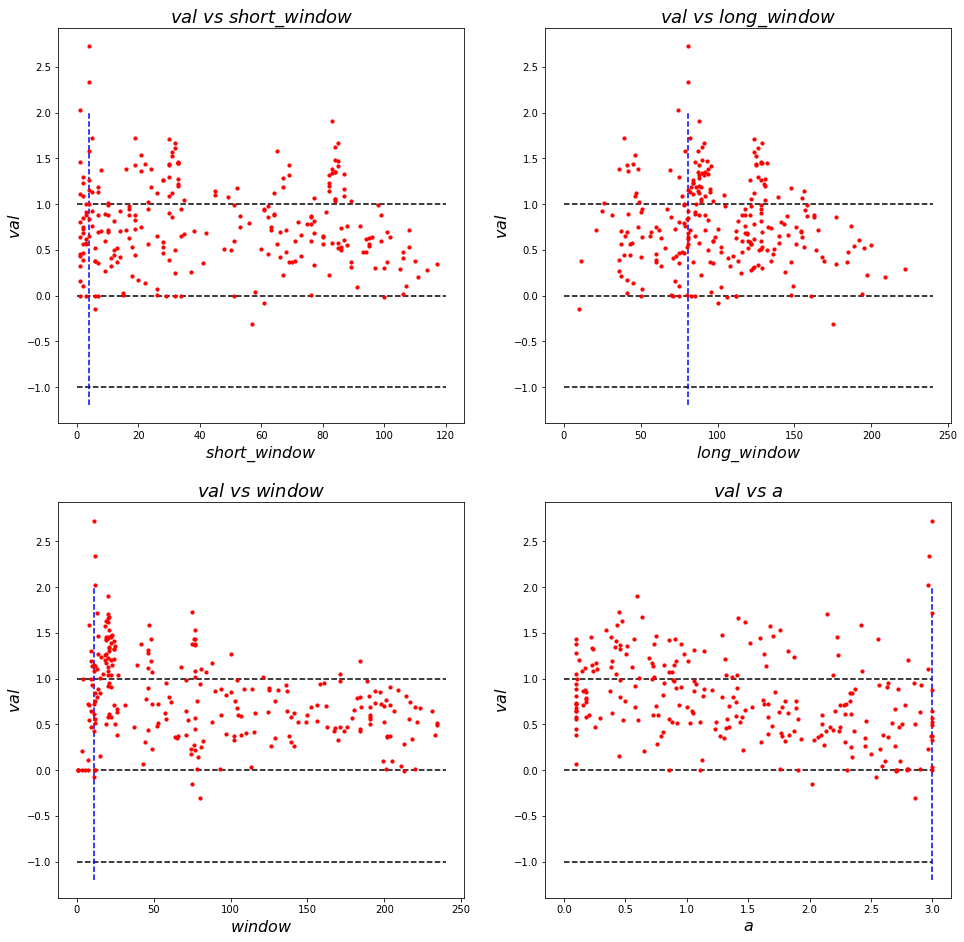

In [24]:
f, ax = plt.subplots(2,2, figsize = (16, 16))
ax[0,0].scatter(BO.X[:,0].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[0,0].set_title('$val$ $vs$ $short\_window$ ', fontsize=18)
ax[0,0].set_xlabel('$short\_window$', fontsize=16)
ax[0,0].set_ylabel('$val$', fontsize=16)
ax[0,0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0,0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0,0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0,0].vlines(BO.res['max']['max_params']['short_window'], -1.2, 2, color='blue',linestyle="--")

ax[0,1].scatter(BO.X[:,1].flatten() + BO.X[:,0].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[0,1].set_title('$val$ $vs$ $long\_window$ ', fontsize=18)
ax[0,1].set_xlabel('$long\_window$', fontsize=16)
ax[0,1].set_ylabel('$val$', fontsize=16)
ax[0,1].hlines(0, 0, 240,color='black',linestyle="--")
ax[0,1].hlines(-1, 0, 240, color='black',linestyle="--")
ax[0,1].hlines(1, 0, 240,color='black',linestyle="--")
ax[0,1].vlines(BO.res['max']['max_params']['delta_window'] + BO.res['max']['max_params']['short_window'],
               -1.2, 2, color='blue',linestyle="--")

ax[1,0].scatter(BO.X[:,2].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[1,0].set_title('$val$ $vs$ $window$ ', fontsize=18)
ax[1,0].set_xlabel('$window$', fontsize=16)
ax[1,0].set_ylabel('$val$', fontsize=16)
ax[1,0].hlines(0, 0, 240,color='black',linestyle="--")
ax[1,0].hlines(-1, 0, 240, color='black',linestyle="--")
ax[1,0].hlines(1, 0, 240,color='black',linestyle="--")
ax[1,0].vlines(BO.res['max']['max_params']['window'], -1.2, 2, color='blue',linestyle="--")

ax[1,1].scatter(BO.X[:,3].flatten(), BO.Y, c="red", s=10, zorder=10)
ax[1,1].set_title('$val$ $vs$ $a$ ', fontsize=18)
ax[1,1].set_xlabel('$a$', fontsize=16)
ax[1,1].set_ylabel('$val$', fontsize=16)
ax[1,1].hlines(0, 0, 3,color='black',linestyle="--")
ax[1,1].hlines(-1, 0, 3, color='black',linestyle="--")
ax[1,1].hlines(1, 0, 3,color='black',linestyle="--")
ax[1,1].vlines(BO.res['max']['max_params']['a'], -1.2, 2, color='blue',linestyle="--")

## Acquisition Function "Probability of Improvement"

* Prefer exploitation (xi=1e-4)
* Prefer exploration (xi=0.1)